In [4]:
import os
import glob
import ast
import json
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

def load_from_pickle(filepath):
    """Load json_tempodata from a Pickle (.pkl) file."""
    # filepath = os.path.join(readpath, filename)
    with open(filepath, "rb") as f:
        json_tempodata = pickle.load(f)
    return json_tempodata

#### Load files

In [5]:
a = 70
b = 145
mode = "uni"
norm_mode = "z-score"


bpm_dict = {
    "bpm_avg_x": 0, "bpm_avg_y": 1, "bpm_avg_xy": 2, "bpm_mode_x": 3,
    "bpm_mode_y": 4, "bpm_mode_xy": 5, "bpm_median_x": 6, "bpm_median_y": 7,
    "bpm_median_xy": 8
}

pos_hits_stats = load_from_pickle(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/hit_stats_{mode}_{a}_{b}.pkl")
pos_consistency_stats = load_from_pickle(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_stats_{mode}_{a}_{b}.pkl")
pos_hits_stats_genrewise = load_from_pickle(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/hit_stats_genrewise_{mode}_{a}_{b}.pkl")      # hits summary genre wise          
pos_consistency_stats_genrewise = load_from_pickle(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_stats_genrewise_{mode}_{a}_{b}.pkl")

vel_hits_stats = load_from_pickle(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/hit_stats_{mode}_{a}_{b}.pkl")
vel_consistency_stats = load_from_pickle(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_stats_{mode}_{a}_{b}.pkl")
vel_hits_stats_genrewise = load_from_pickle(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/hit_stats_genrewise_{mode}_{a}_{b}.pkl")      # hits summary genre wise          
vel_consistency_stats_genrewise = load_from_pickle(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_stats_genrewise_{mode}_{a}_{b}.pkl")

posvel_hits_stats = load_from_pickle(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/hit_stats_{mode}_{a}_{b}.pkl")
posvel_consistency_stats = load_from_pickle(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_stats_{mode}_{a}_{b}.pkl")
posvel_hits_stats_genrewise = load_from_pickle(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/hit_stats_genrewise_{mode}_{a}_{b}.pkl")      # hits summary genre wise          
posvel_consistency_stats_genrewise = load_from_pickle(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/consistency_stats_genrewise_{mode}_{a}_{b}.pkl")

#### Tempo Estimation Accuracy per Body Segment by Metric

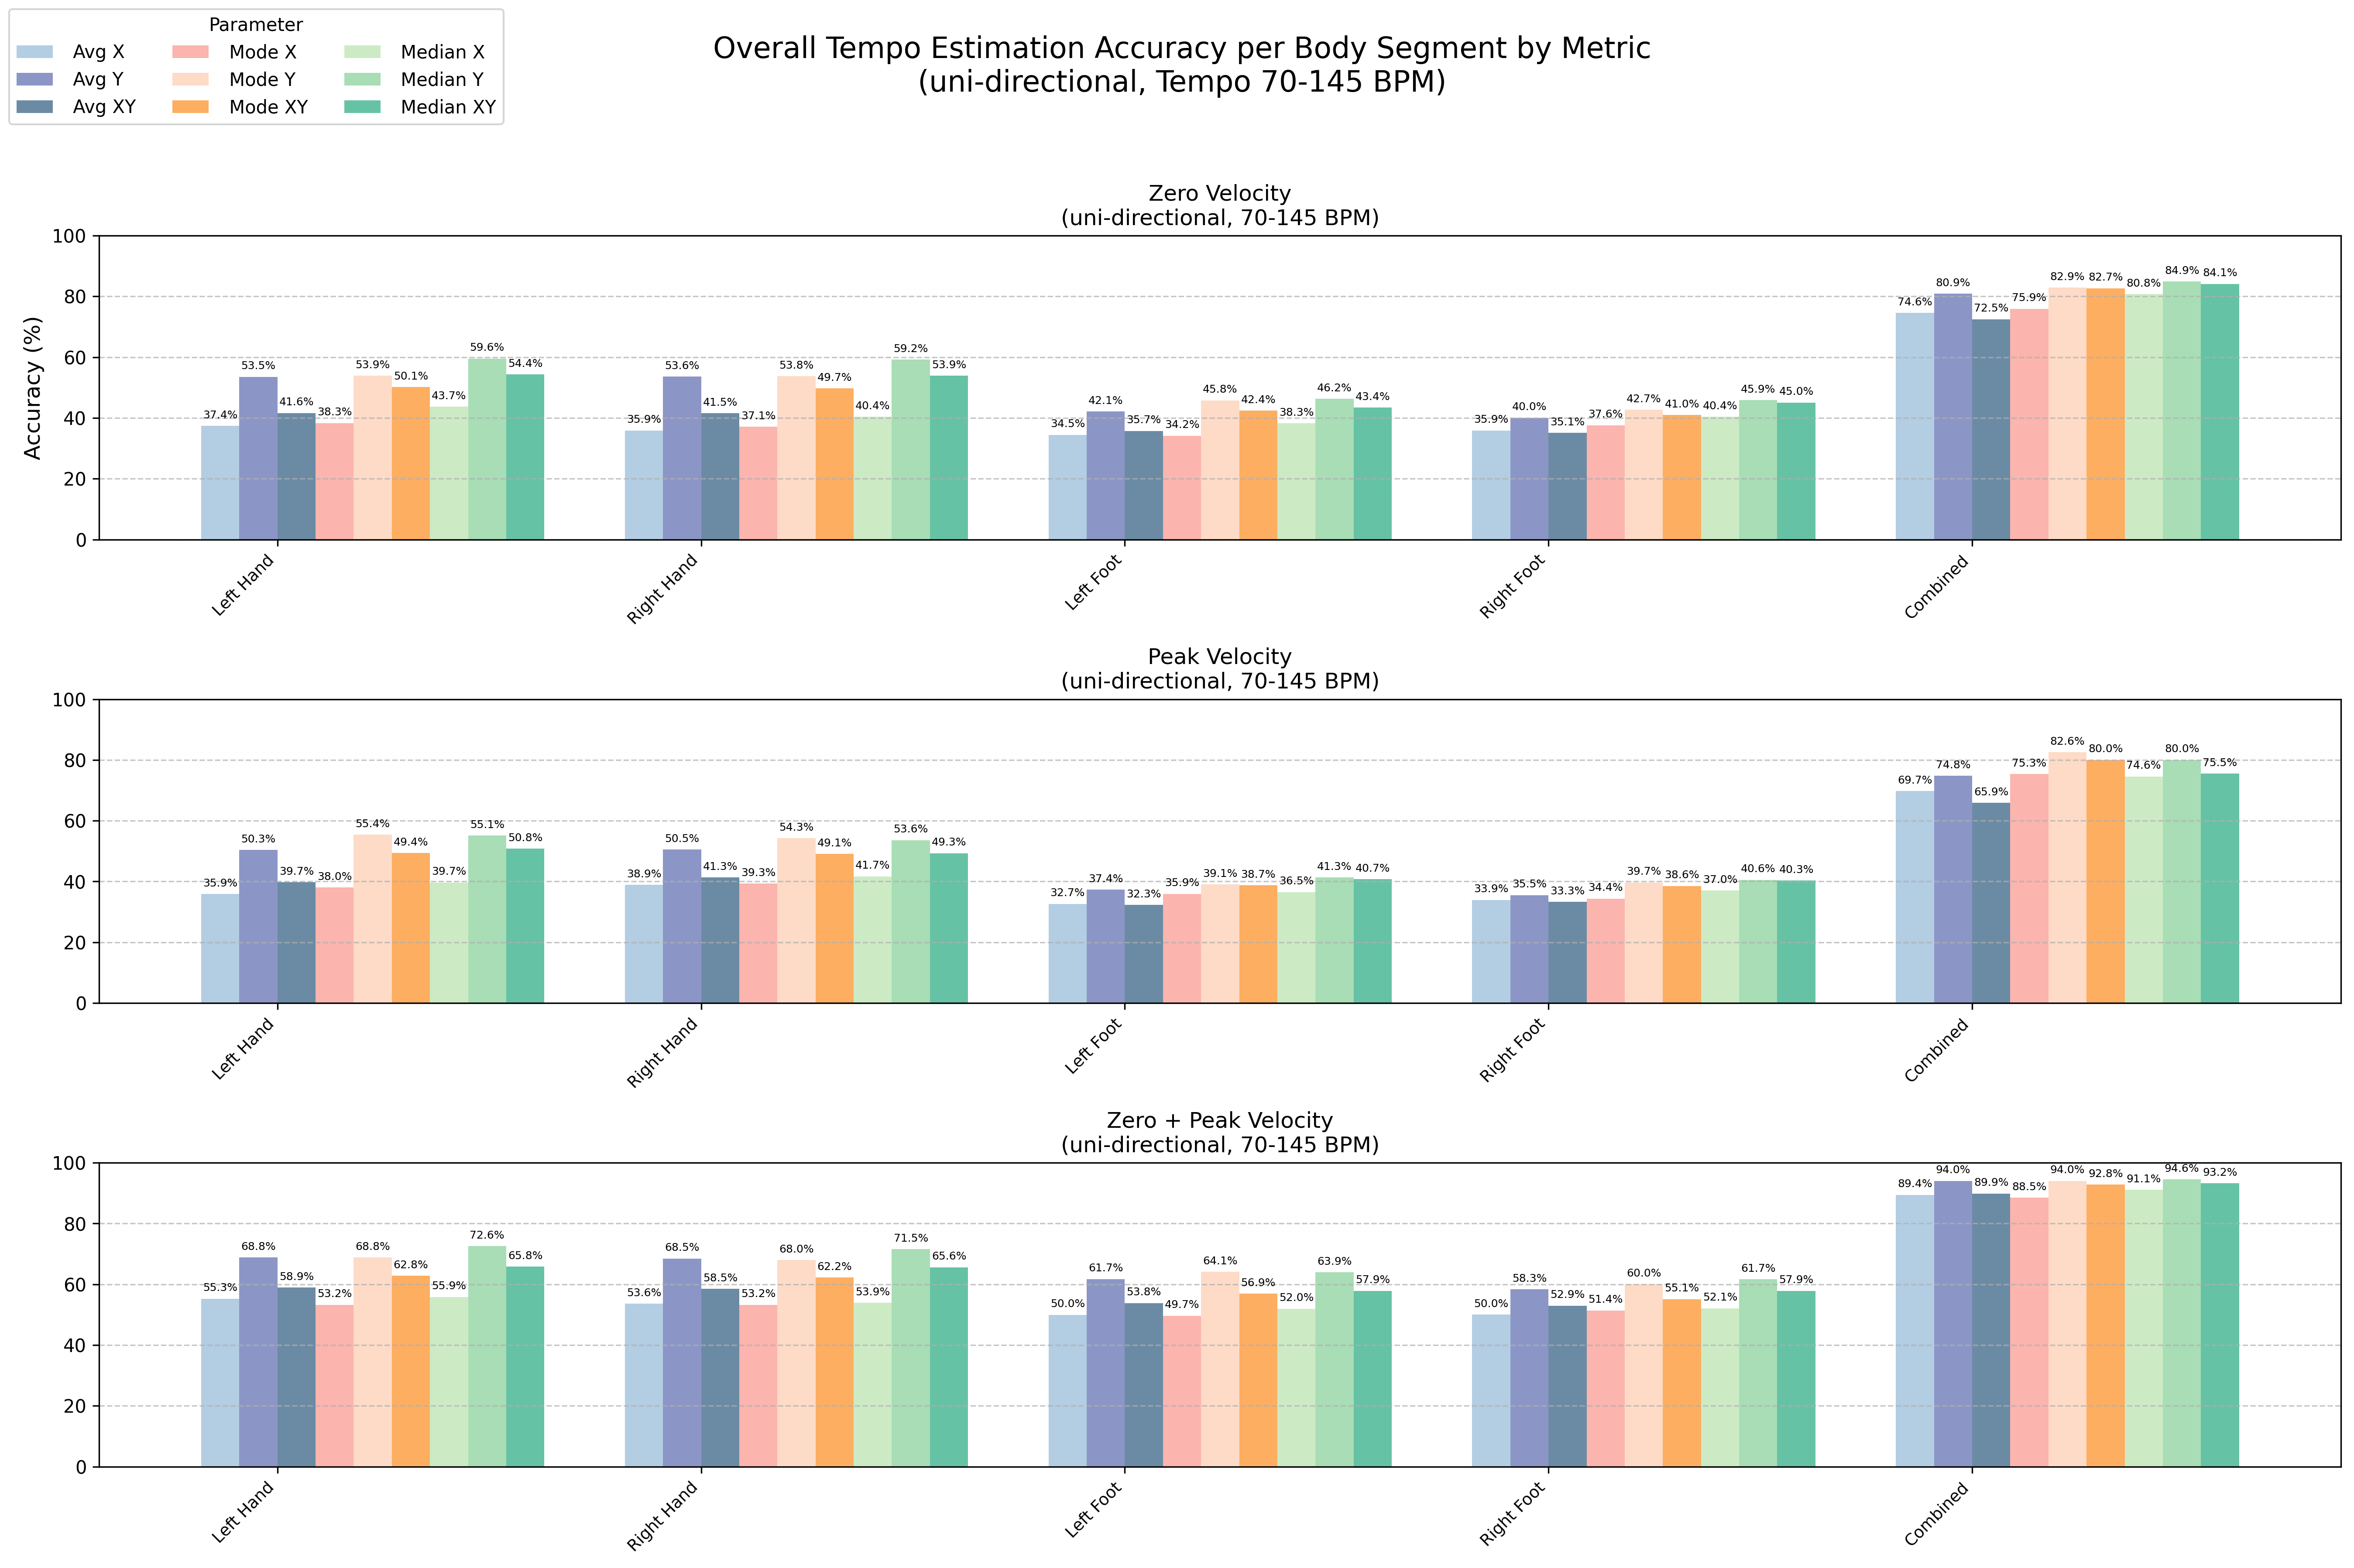

In [ ]:
# Define metric categories
fig, axes = plt.subplots(3, 1, figsize=(18, 12), sharey=True, dpi=300)
width = 0.09  # Bar width for grouped bars

avg_colors = ['#b3cde3', '#8c96c6', '#6b8ba4']  # Muted blue/purple shades for Pos
mode_colors = ['#fbb4ae', '#fddbc7', '#fdae61']  # Muted warm orange/pink shades for Vel
median_colors = ['#ccebc5', '#a8ddb5', '#66c2a5']  # Muted greenish shades for PosVel

labl = {"Zero Velocity": "", "Peak Velocity": "", "Zero + Peak Velocity": ""}
hit_stats_list = {"Zero Velocity": pos_hits_stats, "Peak Velocity": vel_hits_stats, "Zero + Peak Velocity": posvel_hits_stats}

for ax, (title, current_hit_stats) in zip(axes, hit_stats_list.items()):
    # Get the segment indices
    x = np.arange(len(current_hit_stats['bpm_avg_x']['hits_summary']["segment"]))

    # Create grouped bar plots for each metric category
    bars1 = ax.bar(x - 1.5 * width, current_hit_stats['bpm_avg_x']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Avg X', color=avg_colors[0])
    bars2 = ax.bar(x - 0.5 * width, current_hit_stats['bpm_avg_y']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Avg Y', color=avg_colors[1])
    bars3 = ax.bar(x + 0.5 * width, current_hit_stats['bpm_avg_xy']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Avg XY', color=avg_colors[2])

    bars4 = ax.bar(x + 1.5 * width, current_hit_stats['bpm_mode_x']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Mode X', color=mode_colors[0])
    bars5 = ax.bar(x + 2.5 * width, current_hit_stats['bpm_mode_y']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Mode Y', color=mode_colors[1])
    bars6 = ax.bar(x + 3.5 * width, current_hit_stats['bpm_mode_xy']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Mode XY', color=mode_colors[2])

    bars7 = ax.bar(x + 4.5 * width, current_hit_stats['bpm_median_x']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Median X', color=median_colors[0])
    bars8 = ax.bar(x + 5.5 * width, current_hit_stats['bpm_median_y']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Median Y', color=median_colors[1])
    bars9 = ax.bar(x + 6.5 * width, current_hit_stats['bpm_median_xy']['hits_summary']['hits_percentage'], width, label=f'{labl[title]} Median XY', color=median_colors[2])

    # Add bar labels
    for bars in [bars1, bars2, bars3, bars4, bars5, bars6, bars7, bars8, bars9]:
        ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=6)

    # Plot aesthetics
    ax.set_title(f'{title}\n({mode}-directional, {a}-{b} BPM)', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(pos_hits_stats['bpm_avg_x']['hits_summary']["segment"], rotation=45, ha='right', fontsize=9)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Shared y-axis label
axes[0].set_ylabel('Accuracy (%)', fontsize=12)

# Single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Parameter", fontsize=10, title_fontsize=10, loc='upper left', ncol=3)

plt.suptitle(f'Overall Tempo Estimation Accuracy per Body Segment by Metric\n({mode}-directional, Tempo {a}-{b} BPM)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Overall Tempo Accuracy - Single Plot

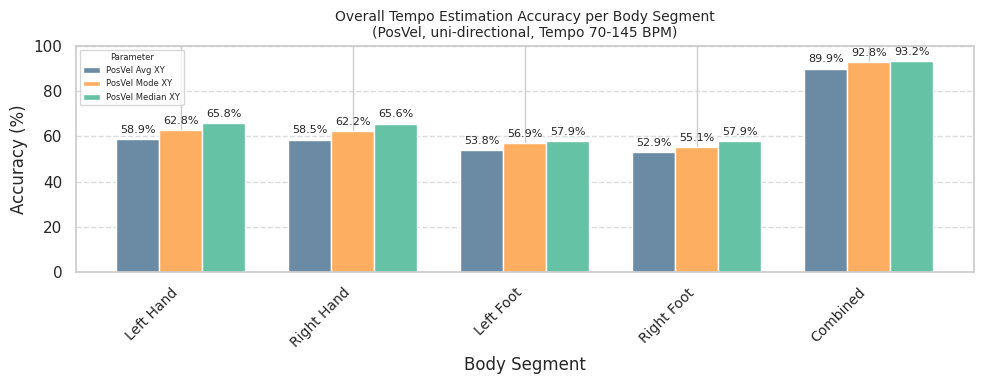

In [14]:
# Grouped bar plot
# pos_df = pd.read_csv(f"./stats_pos/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")
# vel_df = pd.read_csv(f"./stats_vel/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")
# posvel_df = pd.read_csv(f"./stats_posvel/{norm_mode}/tempo_{a}_{b}/{mode}/hits_{mode}_{a}_{b}.csv")

pos_df = posvel_hits_stats['bpm_avg_xy']['hits_summary']
vel_df = posvel_hits_stats['bpm_mode_xy']['hits_summary']
posvel_df = posvel_hits_stats['bpm_median_xy']['hits_summary']

# Plot parameters
x = np.arange(len(pos_df["segment"]))  # Segment indices
width = 0.25  # Width of the bars (adjusted for three groups)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

bars1 = ax.bar(x - width, pos_df["hits_percentage"], width, label='PosVel Avg XY', color=avg_colors[2])
bars2 = ax.bar(x, vel_df["hits_percentage"], width, label='PosVel Mode XY', color=mode_colors[2])
bars3 = ax.bar(x + width, posvel_df["hits_percentage"], width, label='PosVel Median XY', color=median_colors[2])

# Add text labels on top of each bar
for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=8)

# Plot aesthetics
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_xlabel('Body Segment', fontsize=12)
ax.set_title(f'Overall Tempo Estimation Accuracy per Body Segment\n(PosVel, {mode}-directional, Tempo {a}-{b} BPM)', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(pos_df["segment"], rotation=45, ha='right', fontsize=10)
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Parameter", fontsize=6, title_fontsize=6)

plt.tight_layout()
plt.show()

#### Tempo Estimation Accuracy by Genre

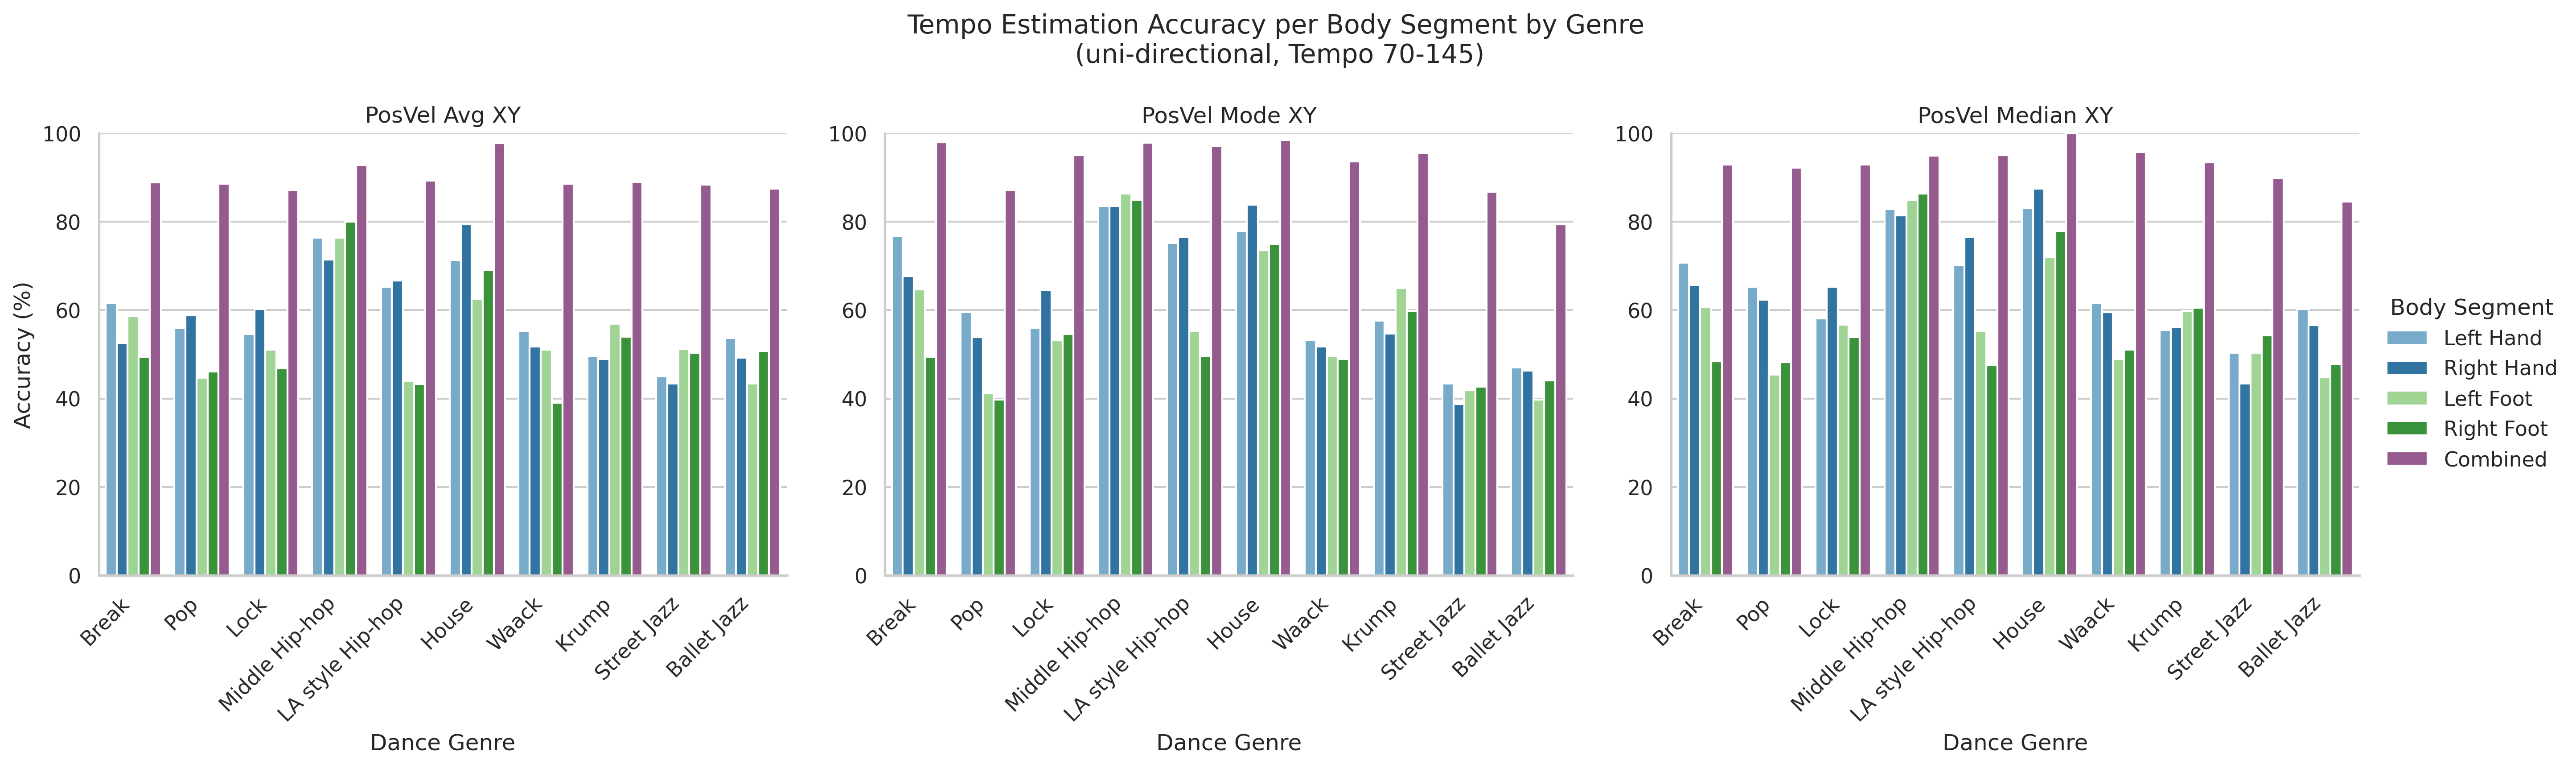

In [8]:
def melt_df(df, metric_label):
    melted = df.melt(
        id_vars=["genre"],
        value_vars=["left_hand_percentage", "right_hand_percentage", "left_foot_percentage", "right_foot_percentage", "Combined_percentage"],
        var_name="Segment",
        value_name="Accuracy"
    )
    # Mapping for cleaner labels
    segment_map = {
        "left_hand_percentage": "Left Hand",
        "right_hand_percentage": "Right Hand",
        "left_foot_percentage": "Left Foot",
        "right_foot_percentage": "Right Foot",
        "Combined_percentage": "Combined"
    }
    melted["Segment"] = melted["Segment"].map(segment_map)
    melted["Metric"] = metric_label
    return melted


# Combine all metrics
pos_melt = melt_df(posvel_hits_stats_genrewise['bpm_avg_xy'], "PosVel Avg XY")
vel_melt = melt_df(posvel_hits_stats_genrewise['bpm_mode_xy'], "PosVel Mode XY")
posvel_melt = melt_df(posvel_hits_stats_genrewise['bpm_median_xy'], "PosVel Median XY")

combined_df = pd.concat([pos_melt, vel_melt, posvel_melt])

palette = {
    "Left Hand": "#6baed6",   # Light Blue (Left Hand)
    "Right Hand": "#1f77b4",  # Dark Blue (Right Hand)
    "Left Foot": "#98df8a",   # Light Green (Left Foot)
    "Right Foot": "#2ca02c",  # Dark Green (Right Foot)
    "Combined": "#a05195"     # Purple (Combined)
}

# Faceted grouped vertical bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=combined_df,
    kind="bar",
    x="genre", y="Accuracy", hue="Segment",
    col="Metric",
    palette=palette,
    height=5, aspect=1.2,
    legend_out=True,
    sharey=False,
)

g.figure.set_dpi(300)
g.set_axis_labels("Dance Genre", "Accuracy (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, 100))
g._legend.set_title("Body Segment")

# Add percentage labels on top of bars
# for ax in g.axes.flat:
#     for container in ax.containers:
#         ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Tempo Estimation Accuracy per Body Segment by Genre\n ({mode}-directional, Tempo {a}-{b})", fontsize=14)
plt.show()

#### BoxPlot: Tempo Accuracy Distributions Across Dance

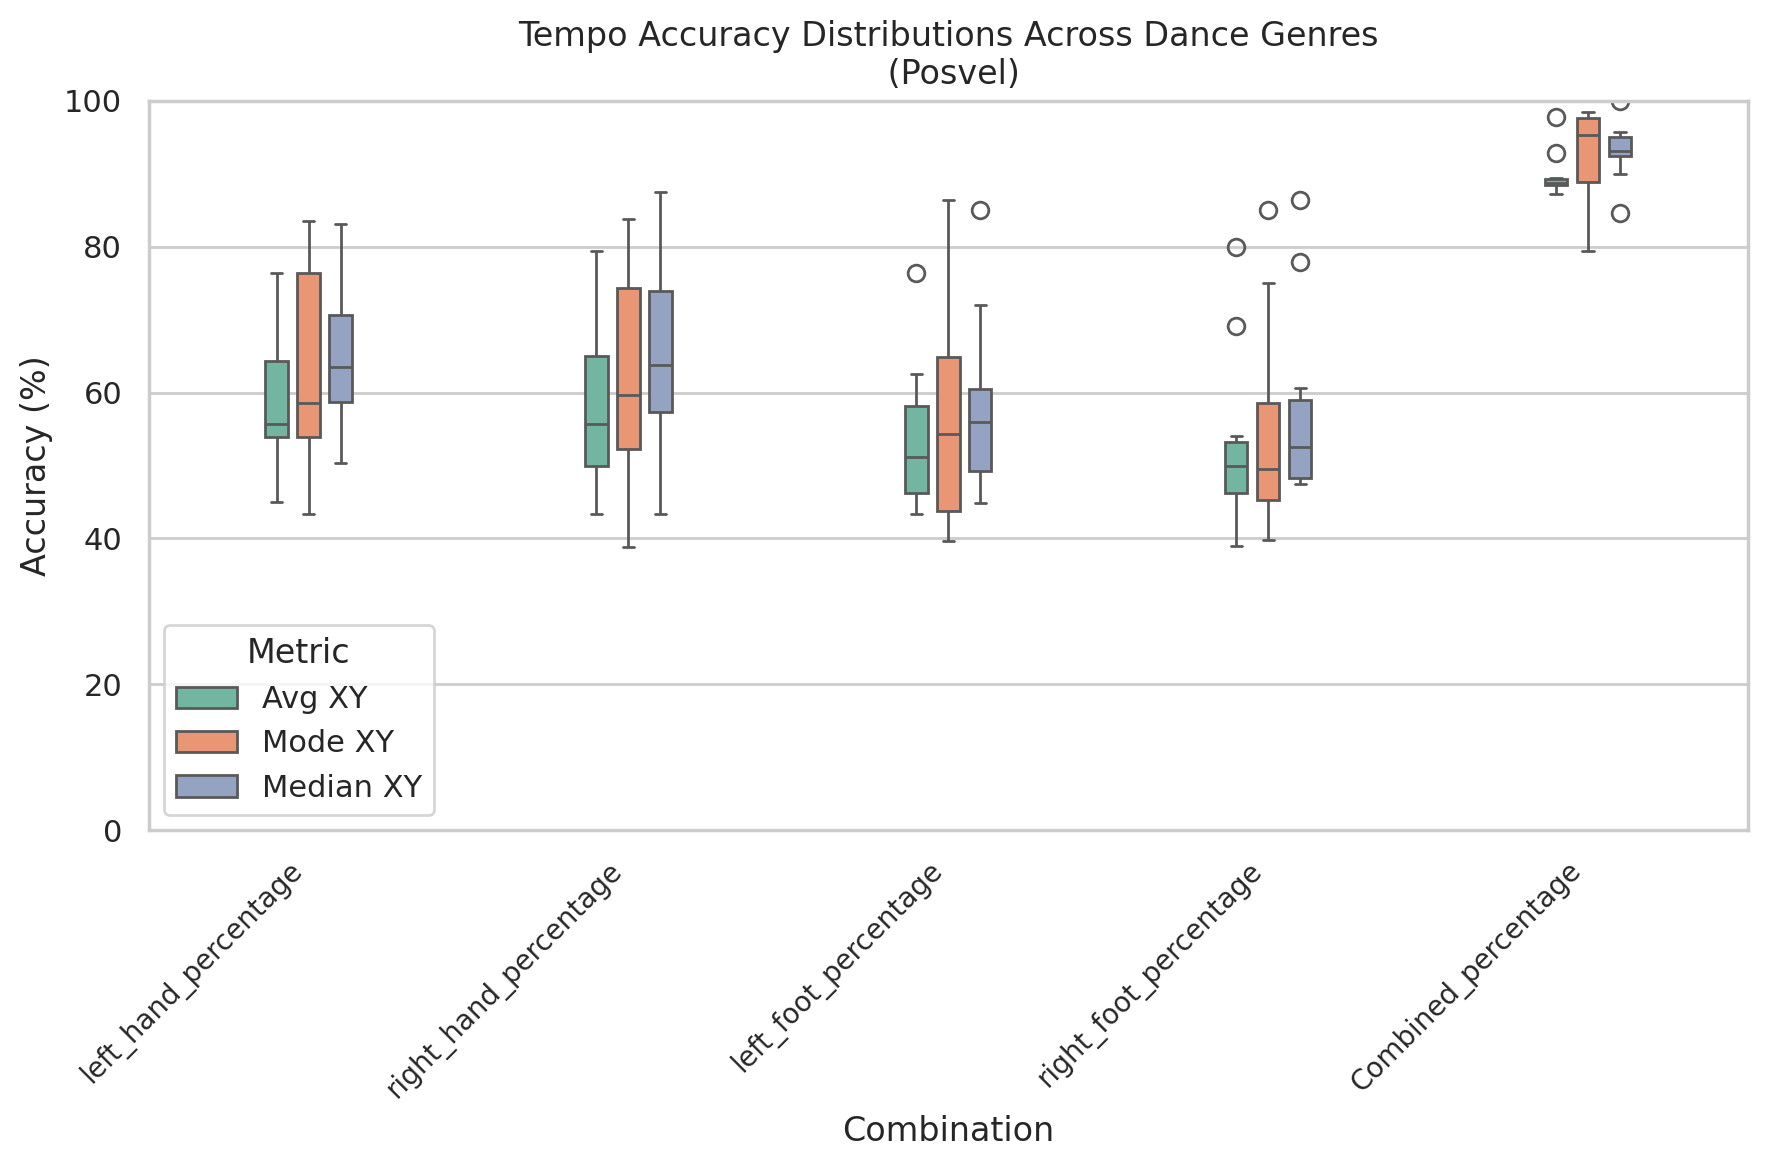

In [9]:
combination = [
    "left_hand_percentage",
    "right_hand_percentage",
    "left_foot_percentage",
    "right_foot_percentage",
    "Combined_percentage",
]

# Melt each dataframe for long-form representation
avg_xy = posvel_hits_stats_genrewise["bpm_avg_xy"].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
avg_xy["Consistency Type"] = "Avg XY"

avg_mode = posvel_hits_stats_genrewise["bpm_mode_xy"].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
avg_mode["Consistency Type"] = "Mode XY"

avg_median = posvel_hits_stats_genrewise["bpm_median_xy"].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
avg_median["Consistency Type"] = "Median XY"

# Combine all long-form dataframes
combined_long = pd.concat([avg_xy, avg_mode, avg_median])

# Create the grouped boxplot
plt.figure(figsize=(9, 6), dpi=200)
sns.boxplot(
    data=combined_long,
    x="Type",
    y="Consistency (%)",
    hue="Consistency Type",  # Grouping by Consistency Type
    palette="Set2",
    width=0.3,
    gap=0.3,
    # fill=False,
    linewidth=1
)

# Plot aesthetics
plt.title(f"Tempo Accuracy Distributions Across Dance Genres\n (Posvel)")
plt.xlabel("Combination")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)
plt.legend(title="Metric", loc="lower left")
# plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Inter limb tempo consistency score

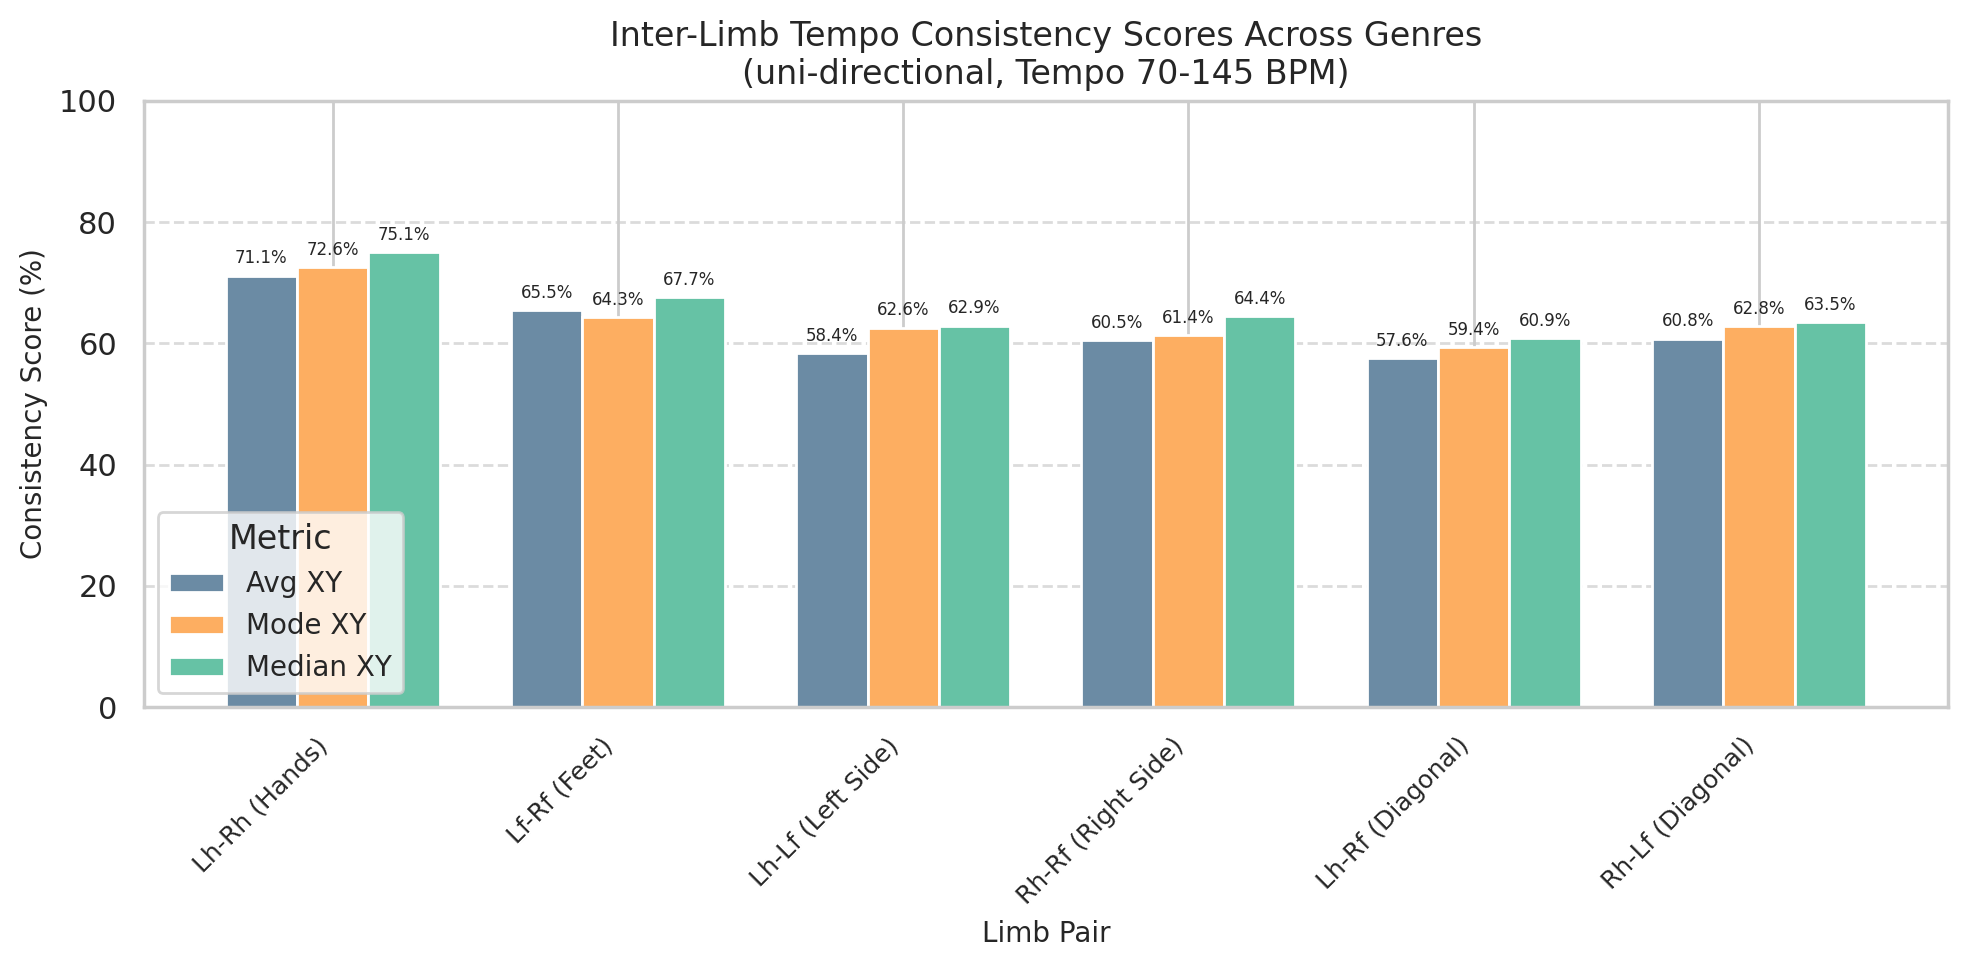

In [10]:

# Combine all three datasets into a single DataFrame
combined_df = pd.DataFrame({
    "Pair": pos_consistency_stats['bpm_avg_x'].keys(),
    "Position": posvel_consistency_stats['bpm_avg_xy'].values(),
    "Velocity": posvel_consistency_stats['bpm_mode_xy'].values(),
    "PosVel": posvel_consistency_stats['bpm_median_xy'].values()
})

# Create grouped bar plot
x = np.arange(len(combined_df["Pair"]))  # label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)

bars1 = ax.bar(x - width, combined_df["Position"], width, label="Avg XY", color=avg_colors[2])
bars2 = ax.bar(x, combined_df["Velocity"], width, label="Mode XY", color=mode_colors[2])
bars3 = ax.bar(x + width, combined_df["PosVel"], width, label="Median XY", color= median_colors[2])

# Formatting the plot
ax.set_xlabel("Limb Pair", fontsize=10)
ax.set_ylabel("Consistency Score (%)", fontsize=10)
ax.set_title(f"Inter-Limb Tempo Consistency Scores Across Genres\n({mode}-directional, Tempo {a}-{b} BPM)", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(combined_df["Pair"], rotation=45, ha="right", fontsize=9)
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Metric", fontsize=10, loc= 'lower left')

# Adding percentage labels on top of bars
for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=6)

plt.tight_layout()
plt.show()


#### Hand & Foot tempo consistency score by genre

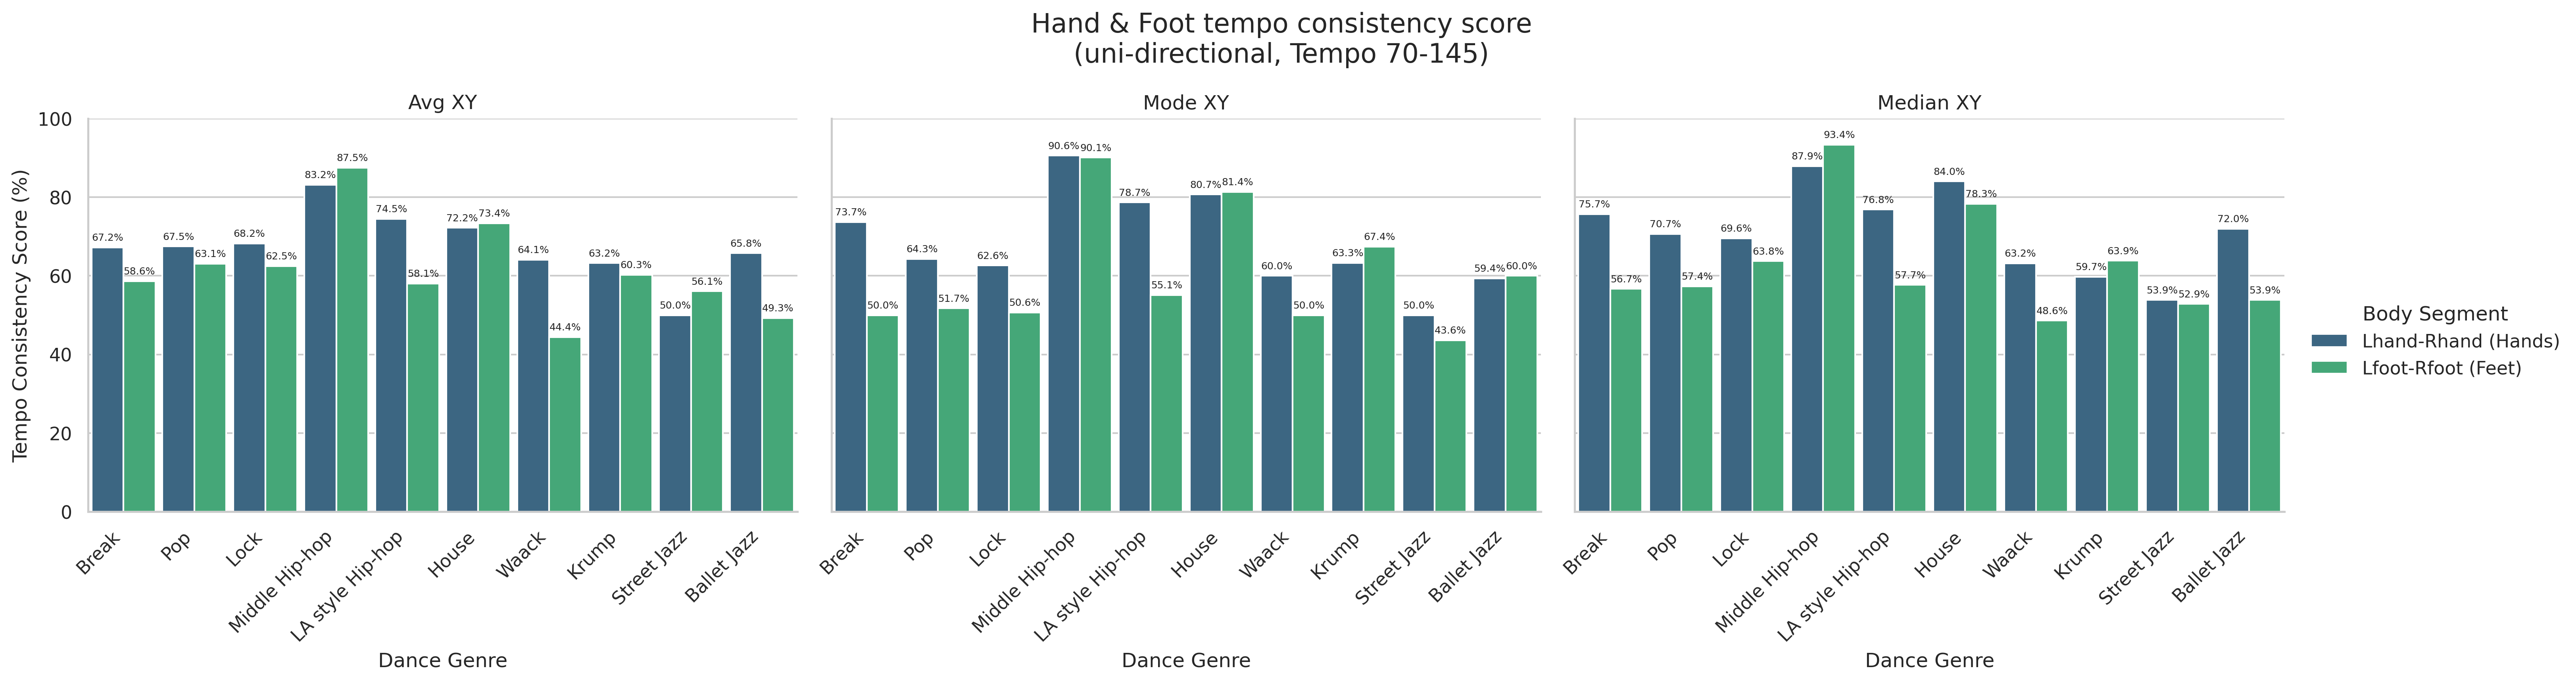

In [11]:
def melt_df(df, metric_label):
    return df.melt(
        id_vars=["genre"],
        value_vars=["Lhand-Rhand (Hands)", "Lfoot-Rfoot (Feet)"],
        var_name="Segment",
        value_name="Consistency_Score"
    ).assign(Metric=metric_label)

pos_melt = melt_df(posvel_consistency_stats_genrewise['bpm_avg_xy'], "Avg XY")
vel_melt = melt_df(posvel_consistency_stats_genrewise['bpm_mode_xy'], "Mode XY")
posvel_melt = melt_df(posvel_consistency_stats_genrewise['bpm_median_xy'], "Median XY")

combined_df = pd.concat([pos_melt, vel_melt, posvel_melt])

# 🏃‍♂️ Plotting faceted grouped bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=combined_df,
    kind="bar",
    x="genre", y="Consistency_Score", hue="Segment",
    col="Metric", col_wrap=3,
    palette="viridis",
    height=5, aspect=1.3,
    width= 0.9,
    legend=True,
    legend_out=True,

)

g.figure.set_dpi(300)
g.set_axis_labels("Dance Genre", "Tempo Consistency Score (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, 100))
# g.add_legend(title="Body Segment")
g._legend.set_title("Body Segment")

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=6)

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Hand & Foot tempo consistency score\n({mode}-directional, Tempo {a}-{b})", fontsize=16)
plt.show()


#### Left Side & Right Side Tempo Consistency Score

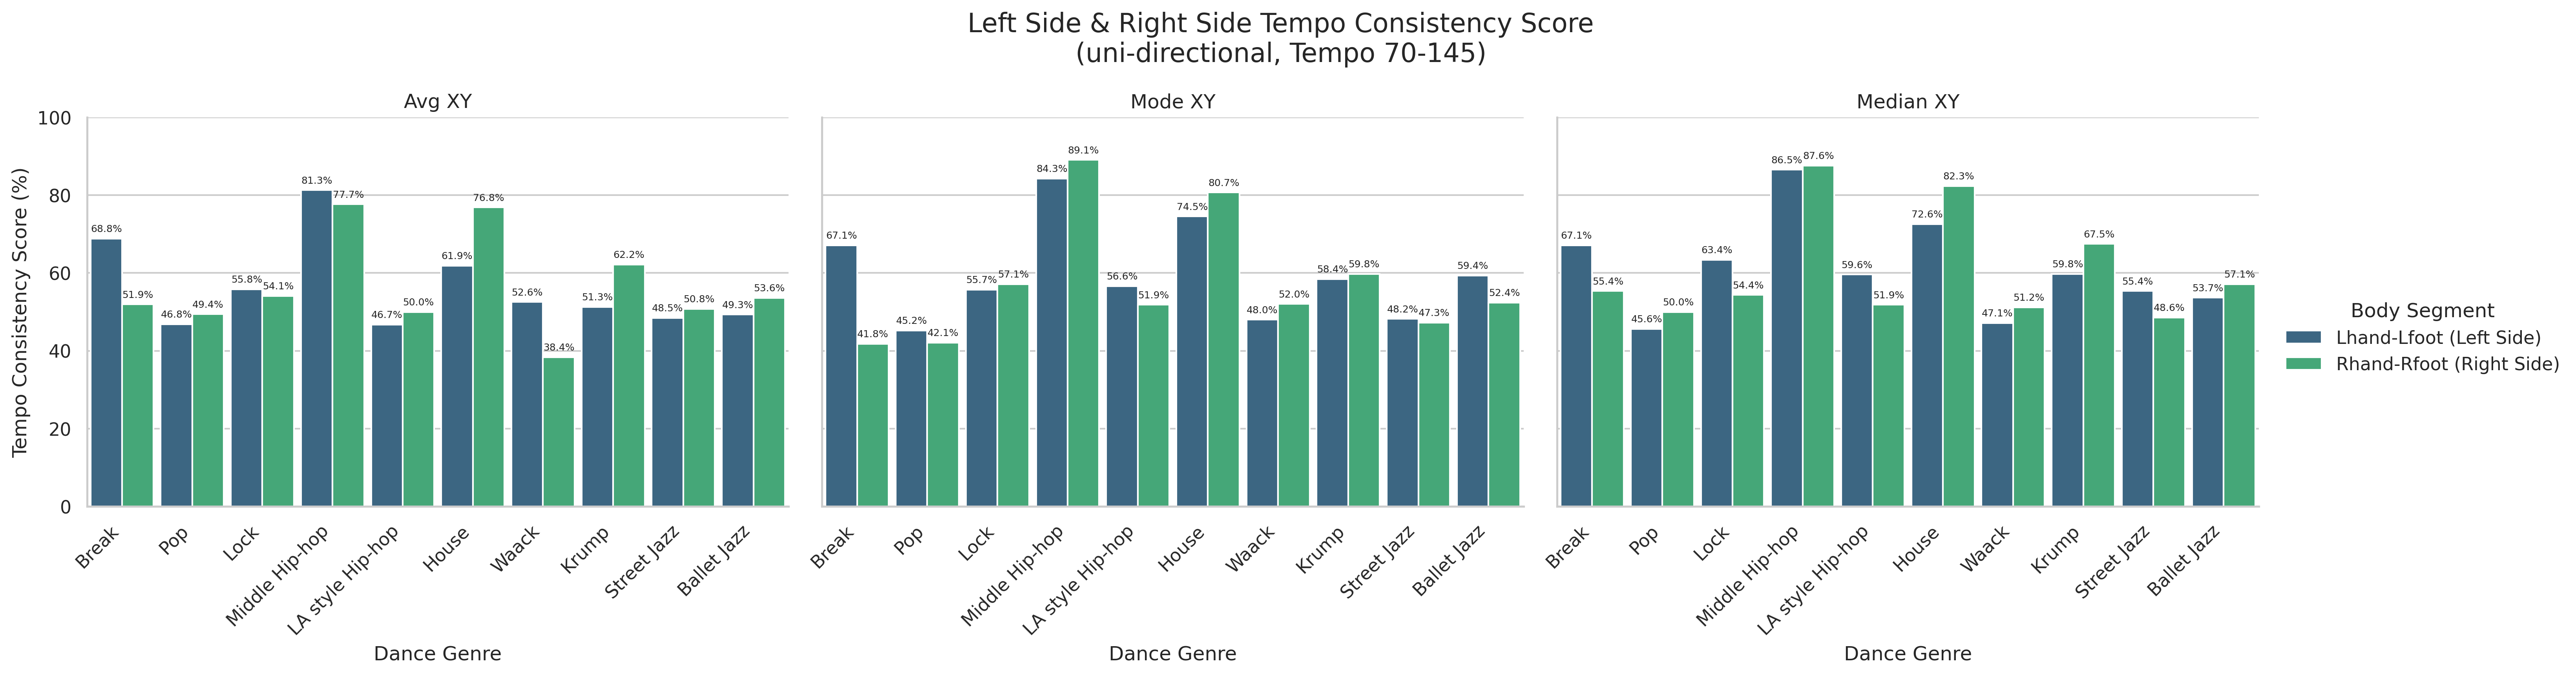

In [12]:
def melt_df(df, metric_label):
    return df.melt(
        id_vars=["genre"],
        value_vars=["Lhand-Lfoot (Left Side)", "Rhand-Rfoot (Right Side)"],
        var_name="Segment",
        value_name="Consistency_Score"
    ).assign(Metric=metric_label)

pos_melt = melt_df(posvel_consistency_stats_genrewise['bpm_avg_xy'], "Avg XY")
vel_melt = melt_df(posvel_consistency_stats_genrewise['bpm_mode_xy'], "Mode XY")
posvel_melt = melt_df(posvel_consistency_stats_genrewise['bpm_median_xy'], "Median XY")

side_combined_df = pd.concat([pos_melt, vel_melt, posvel_melt])

# 🏃‍♂️ Plotting faceted grouped bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=side_combined_df,
    kind="bar",
    x="genre", y="Consistency_Score", hue="Segment",
    col="Metric", col_wrap=3,
    palette="viridis",
    height=5, aspect=1.3,
    width= 0.9,
    legend=True,
    legend_out=True,

)

g.figure.set_dpi(300)
g.set_axis_labels("Dance Genre", "Tempo Consistency Score (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.set(ylim=(0, 100))
# g.add_legend(title="Body Segment")
g._legend.set_title("Body Segment")

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=6)

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Left Side & Right Side Tempo Consistency Score\n({mode}-directional, Tempo {a}-{b})", fontsize=16)
plt.show()

#### Box Plot: Consistency Distribution across genres

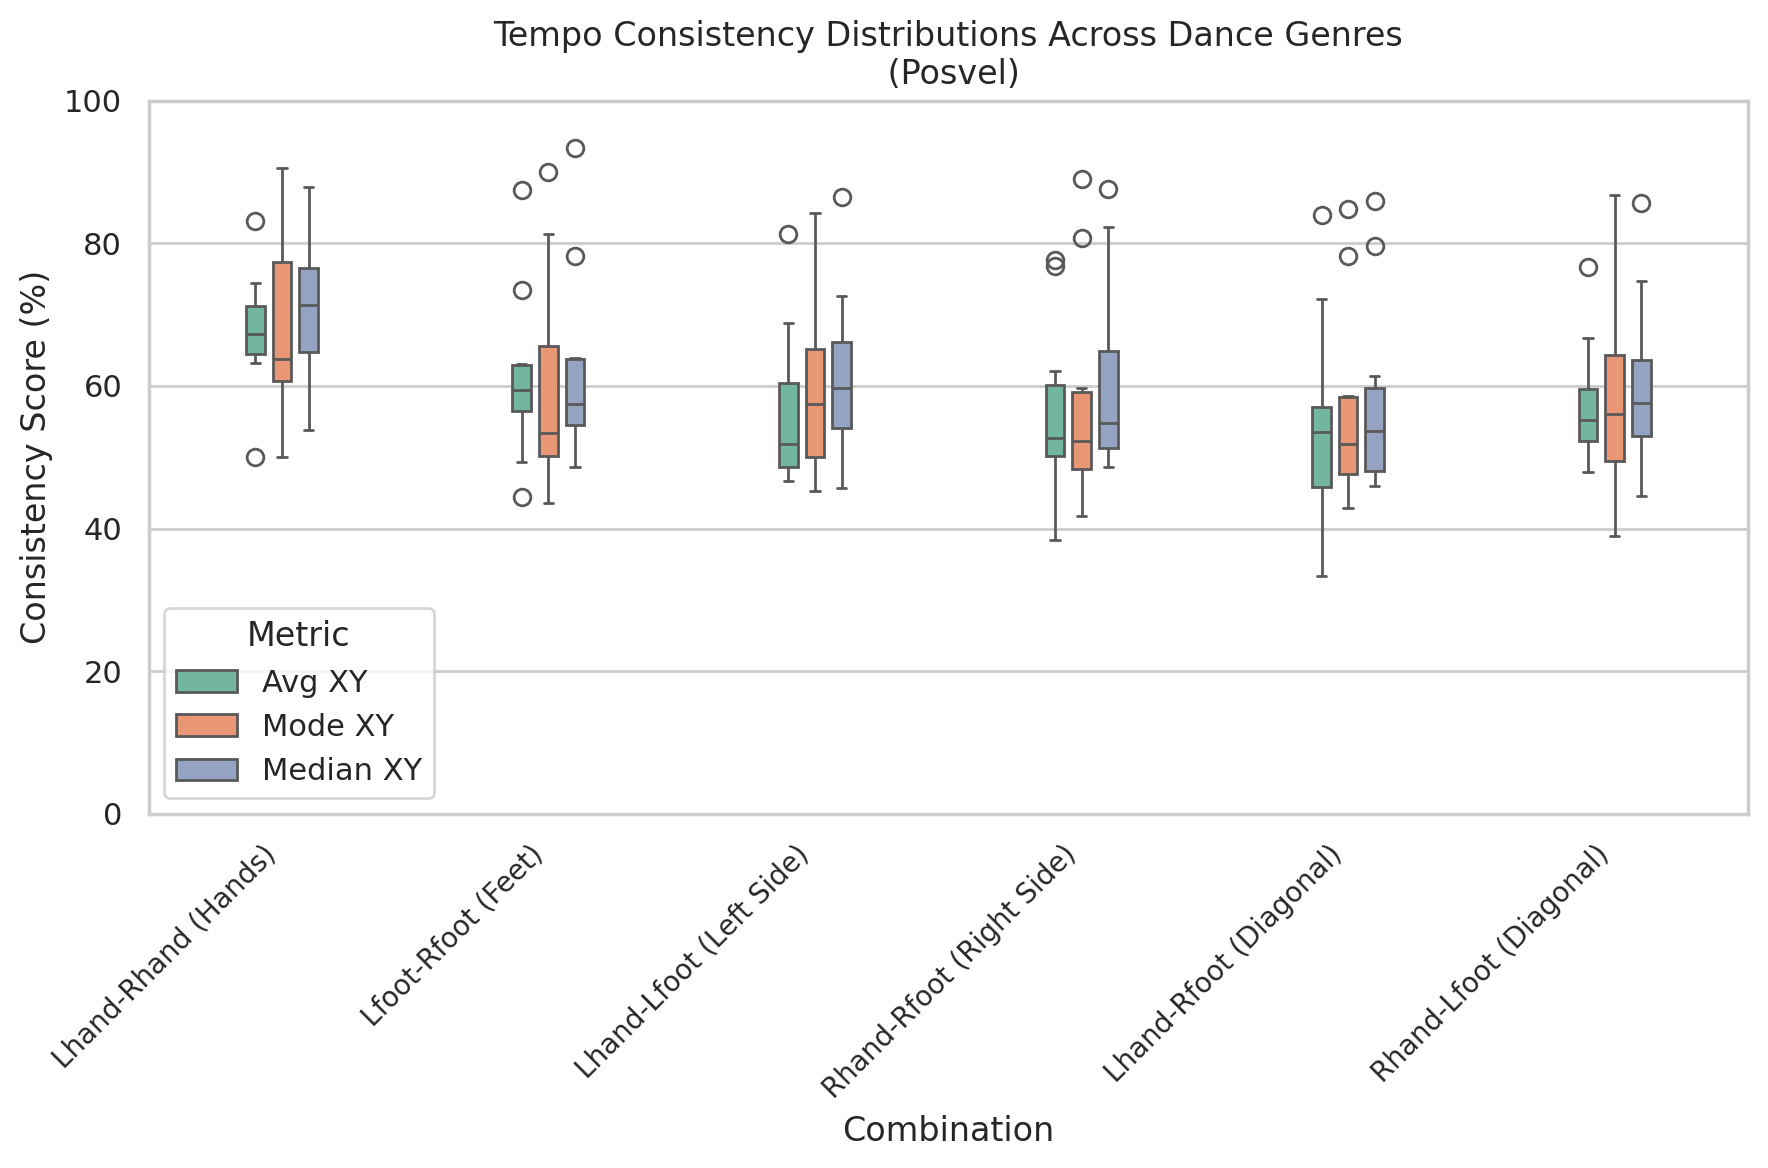

In [13]:
# combination = [
#     "left_hand_percentage",
#     "right_hand_percentage",
#     "left_foot_percentage",
#     "right_foot_percentage",
#     "Combined_percentage",
# ]

combination = [
    "Lhand-Rhand (Hands)",
    "Lfoot-Rfoot (Feet)",
    "Lhand-Lfoot (Left Side)",
    "Rhand-Rfoot (Right Side)",
    "Lhand-Rfoot (Diagonal)",
    "Rhand-Lfoot (Diagonal)"
]


# bpm_metric = "bpm_avg_xy"

# Melt each dataframe for long-form representation
avg_xy = posvel_consistency_stats_genrewise["bpm_avg_xy"].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
avg_xy["Consistency Type"] = "Avg XY"

avg_mode = posvel_consistency_stats_genrewise["bpm_mode_xy"].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
avg_mode["Consistency Type"] = "Mode XY"

avg_median = posvel_consistency_stats_genrewise["bpm_median_xy"].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
avg_median["Consistency Type"] = "Median XY"

# Combine all long-form dataframes
combined_long = pd.concat([avg_xy, avg_mode, avg_median])

# Create the grouped boxplot
plt.figure(figsize=(9, 6), dpi=200)
sns.boxplot(
    data=combined_long,
    x="Type",
    y="Consistency (%)",
    hue="Consistency Type",  # Grouping by Consistency Type
    palette="Set2",
    width=0.3,
    gap=0.3,
    # fill=False,
    linewidth=1
)

# Plot aesthetics
plt.title(f"Tempo Consistency Distributions Across Dance Genres\n (Posvel)")
plt.xlabel("Combination")
plt.ylabel("Consistency Score (%)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)
plt.legend(title="Metric", loc="lower left")
# plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
